# Quick start tutorial

This tutorial only shows the most basic use case on 2D images.

Let us first create a dense deformation and an affine transformation and then compose them.

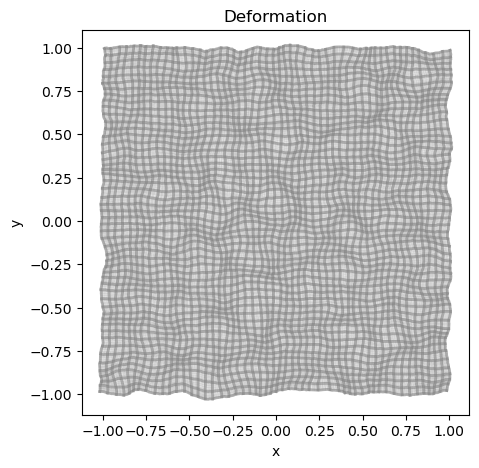

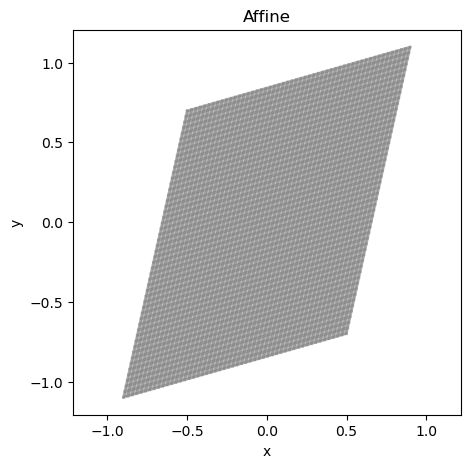

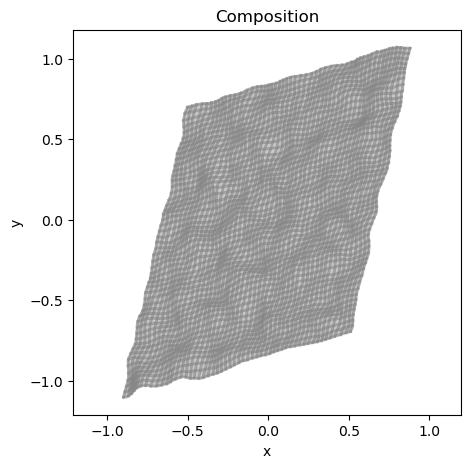

In [2]:
import torch
import matplotlib.pyplot as plt

import composable_mapping as cm
from torchvision.transforms import GaussianBlur

coordinate_system = cm.CoordinateSystem.create_centered_normalized(spatial_shape=(256, 256))
deformation = cm.samplable_volume(
    GaussianBlur(kernel_size=21, sigma=7.0)(20 * torch.randn(1, 2, 256, 256)),
    coordinate_system=coordinate_system,
    data_format=cm.DataFormat.voxel_displacements(),
)
affine = cm.affine(torch.tensor([[0.7, 0.2, 0.0], [0.2, 0.9, 0.0], [0.0, 0.0, 1.0]]))
composition = deformation @ affine
deformation.visualize_as_deformed_grid(emphasize_every_nth_line=(5, 0))
plt.title("Deformation")
plt.show()
affine.visualize_to_as_deformed_grid(coordinate_system, emphasize_every_nth_line=(5, 0))
plt.title("Affine")
plt.show()
composition.visualize_as_deformed_grid(emphasize_every_nth_line=(5, 0))
plt.title("Composition")
plt.show()

Let us apply the composed deformation to an image

torch.Size([1, 1, 512, 512])


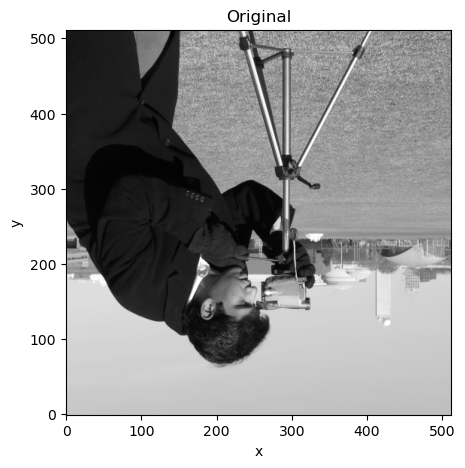

torch.Size([1, 1, 512, 512])


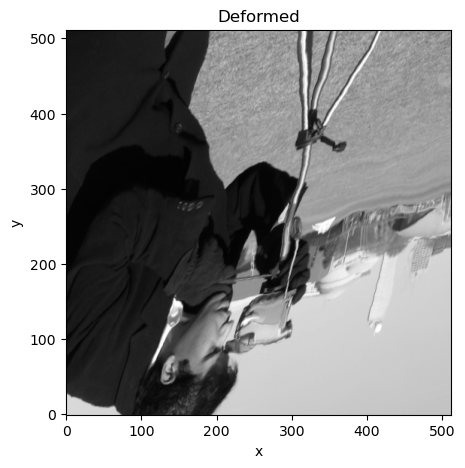

In [4]:
from matplotlib.image import imread

image_data = torch.from_numpy(imread("../tutorials/camera.png"))[None, None]
image = cm.samplable_volume(
    image_data,
    coordinate_system=cm.CoordinateSystem.create_centered_normalized(
        spatial_shape=image_data.shape[2:]
    ).transform_world_with_diagonal_matrix(torch.tensor([-1.0, 1.0])),
)
deformed_image = image @ composition

image.visualize_as_image()
plt.title("Original")
plt.show()
deformed_image.visualize_as_image()
plt.title("Deformed")
plt.show()

We also have the mask available which indicates which points have not been extrapolated from outside the original image.

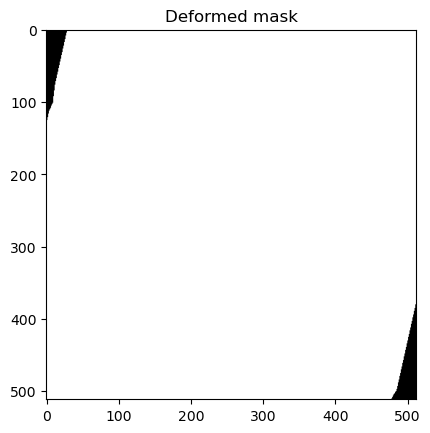

In [3]:
plt.title("Deformed mask")
plt.imshow(deformed_image.generate_mask()[0, 0], cmap="gray")